In [1]:
# 우선적으로 데이터만 들어있는 엑셀 파일을 편의상 csv 파일로 바꿔서 원하는 형태로 저장하는 과정부터 거친다.
# 본 전처리에서 비교하고자 하는 것은 1. 키(cm) 2. 몸무게(kg) 3. bmi 정도가 있는데 여기서 필요한 건 우선적으로 키와 몸무게 컬럼을 나누는 과정이다.
# 또한 나이를 구하기 위해 생년월일에서 비교 날짜인 부분으로 나눠서 이에 따른 나이를 구한다.
# 물론 kbo 공식 사이트의 신체 스펙이 언제 등록된 선수의 정보인 지 알 지 못하는 한계가 있지만 성인의 신체조건은 유년기와 다르게 크게 변하지 않기에 그 격차가 데이터를 오염할 정도가 아니라고 판단
# 타자의 테크닉적 분석의 기준과 서양 선수들의 데이터 기준 2023년도에 맞춰서 계산하도록 하겠다.
from google.colab import files
uploaded = files.upload()

Saving kbo 타자 신체정보.xlsx to kbo 타자 신체정보 (1).xlsx


In [2]:
!pip install openpyxl
import pandas as pd

In [4]:
# 엑셀 파일 읽기
df = pd.read_excel("kbo 타자 신체정보.xlsx", skiprows=1, header=None)

# 컬럼명 지정
df.columns = ['Unnamed1', 'Unnamed2', '등번호', '이름', '팀명', '포지션', '생년월일', '신체정보', '학력']

# 여기서 이제 신체정보를 키와 몸무게로 나누는 과정이 필요하다.
def parse_physical_info(info):
    if isinstance(info, str) and 'cm' in info and 'kg' in info:
        try:
            height, weight = info.split(',')
            height_cm = int(height.replace('cm', '').strip())
            weight_kg = int(weight.replace('kg', '').strip())
            return pd.Series([height_cm, weight_kg])
        except:
            return pd.Series([None, None])
    return pd.Series([None, None])

df[['키_cm', '몸무게_kg']] = df['신체정보'].apply(parse_physical_info)

from datetime import datetime

# 기준 날짜: 2023년 12월 31일 (해외 리그 비교를 위해 고정 기준일 설정)
reference_date = datetime(2023, 12, 31)

# 생년월일 컬럼이 datetime 형태인지 확인하고, 아니라면 변환
df['생년월일'] = pd.to_datetime(df['생년월일'], errors='coerce')

# 만나이 계산 함수
def calculate_age(birthdate):
    if pd.isna(birthdate):
        return None
    age = reference_date.year - birthdate.year
    if (reference_date.month, reference_date.day) < (birthdate.month, birthdate.day):
        age -= 1  # 생일이 안 지났으면 한 살 덜 먹음
    return age

# 적용
df['나이_만'] = df['생년월일'].apply(calculate_age)

# 기존 정리된 컬럼에 추가
df_clean = df[['등번호', '이름', '팀명', '포지션', '생년월일', '나이_만', '학력', '키_cm', '몸무게_kg']]
df_clean.head()

#미리 보기 결과를 통해 정상적으로 나눠진 것을 확인. 이제 이것들을 저장하는 과정을 거친다.

,등번호,이름,팀명,포지션,생년월일,나이_만,학력,키_cm,몸무게_kg
0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,117.0,강민균,LG,내야수,2000-07-17,23.0,강남초-서울이수중-덕수고-홍익대,178.0,81.0
2,5.0,강민성,KT,내야수,1999-12-08,24.0,대구옥산초-경상중-경북고,180.0,85.0
3,127.0,강민성,삼성,내야수,2006-02-22,17.0,연현초-잠신중-안산공고,183.0,85.0
4,13.0,강민제,KIA,내야수,2005-02-10,18.0,군산중앙초-군산중-군산상일고,181.0,82.0


In [5]:
df_clean.to_csv("kbo_batter_physical_data_cleaned.csv", index=False)

files.download("kbo_batter_physical_data_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
import pandas as pd

# 파일명 확인 후 불러오기
df_check = pd.read_csv("kbo_batter_physical_data_cleaned.csv")

# 출력 설정
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

# 확인
df_check.head(100)

,등번호,이름,팀명,포지션,생년월일,나이_만,학력,키_cm,몸무게_kg
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,117.0,강민균,LG,내야수,2000-07-17,23.0,강남초-서울이수중-덕수고-홍익대,178.0,81.0
2,5.0,강민성,KT,내야수,1999-12-08,24.0,대구옥산초-경상중-경북고,180.0,85.0
3,127.0,강민성,삼성,내야수,2006-02-22,17.0,연현초-잠신중-안산공고,183.0,85.0
4,13.0,강민제,KIA,내야수,2005-02-10,18.0,군산중앙초-군산중-군산상일고,181.0,82.0
5,50.0,강백호,KT,내야수,1999-07-29,24.0,부천북초-서울이수중-서울고,184.0,98.0
6,NaN,강성우,롯데,내야수,2005-04-12,18.0,대전유천초-한밭중-청주고-롯데-상무,182.0,77.0
7,23.0,강승호,두산,내야수,1994-02-09,29.0,순천북초-천안북중-북일고-LG-경찰-LG-SK,178.0,88.0
8,27.0,강진성,키움,내야수,1993-10-19,30.0,가동초-잠신중-경기고-NC-경찰-NC-두산-SSG,176.0,89.0
9,58.0,강진형,고양,내야수,1988-06-06,35.0,덕수정보고-인하대,176.0,74.0


In [10]:
# 파일명 확인 후 불러오기
df_check = pd.read_csv("baseball_players.csv")

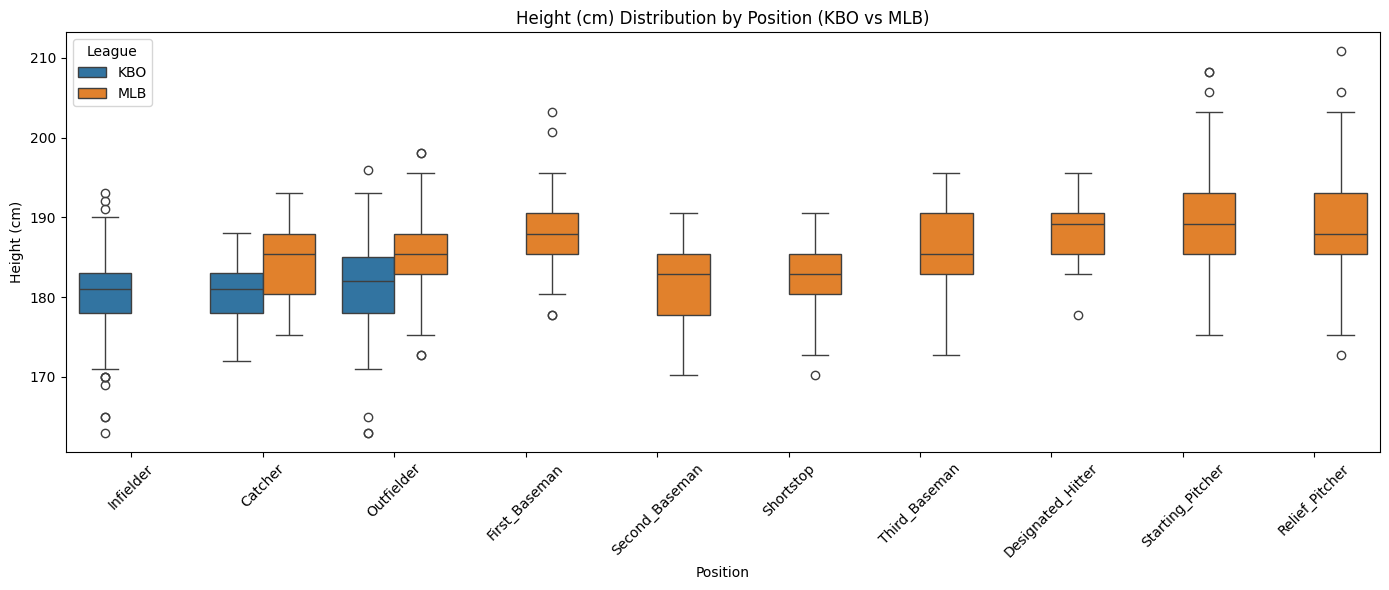

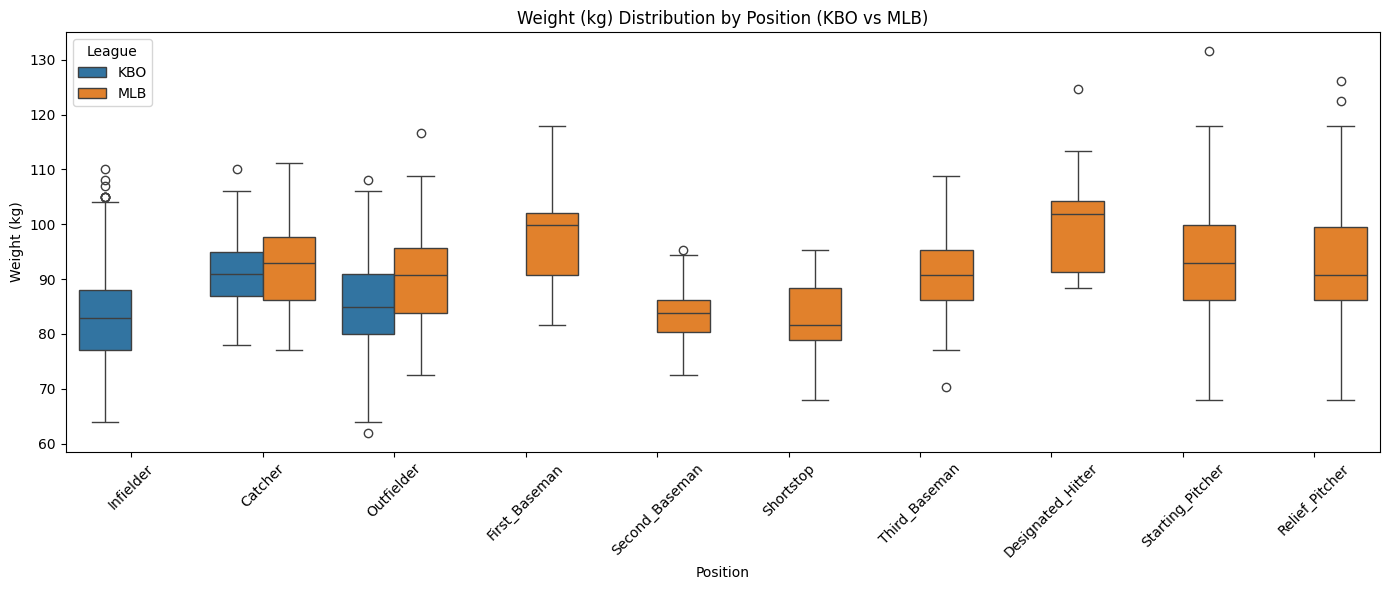

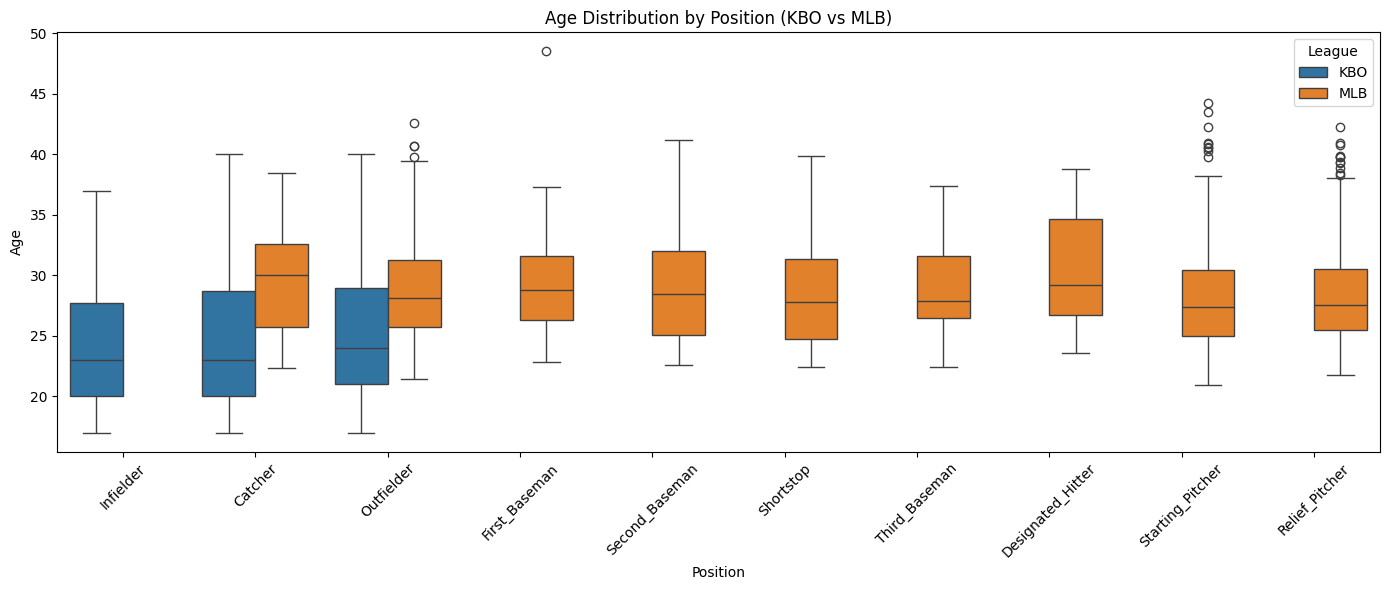

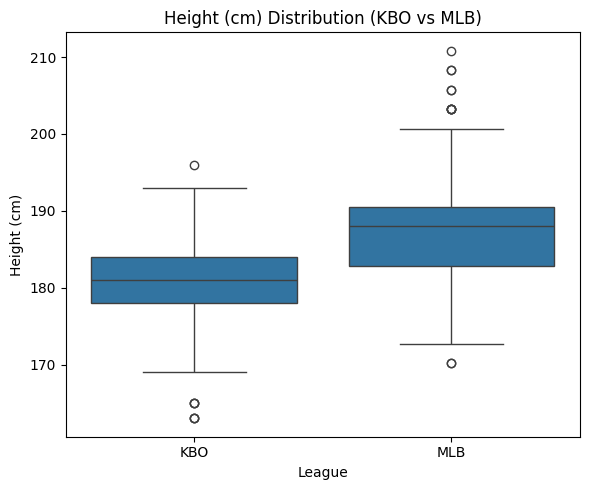

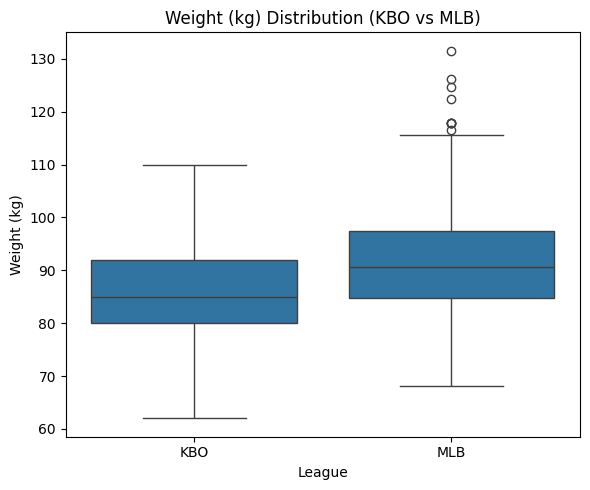

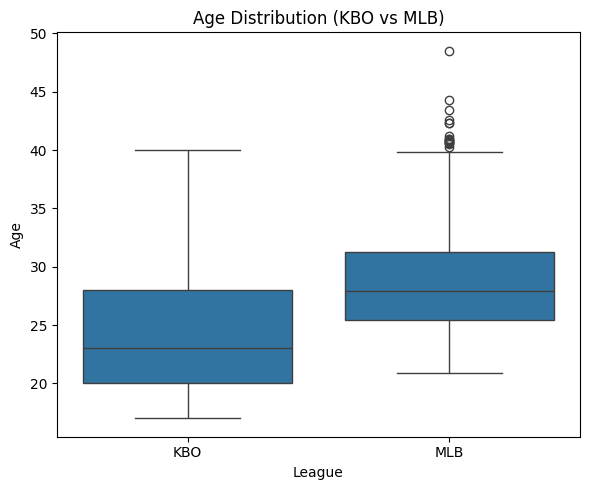

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the combined dataset (from previous steps)
kbo_df = pd.read_csv("/content/kbo_batter_physical_data_cleaned.csv")
mlb_df = pd.read_csv("/content/baseball_players.csv")

# Unit conversion for MLB players
mlb_df['Height_cm'] = mlb_df['Height(inches)'] * 2.54
mlb_df['Weight_kg'] = mlb_df['Weight(pounds)'] * 0.453592

# Normalize column names
kbo_common = kbo_df[['이름', '포지션', '키_cm', '몸무게_kg', '나이_만']].copy()
mlb_common = mlb_df[['Name', 'Position', 'Height_cm', 'Weight_kg', 'Age']].copy()
kbo_common.columns = ['Name', 'Position', 'Height_cm', 'Weight_kg', 'Age']
mlb_common.columns = ['Name', 'Position', 'Height_cm', 'Weight_kg', 'Age']

kbo_common['League'] = 'KBO'
mlb_common['League'] = 'MLB'

kbo_position_map = {
    "외야수": "Outfielder",
    "내야수": "Infielder",
    "포수": "Catcher",
    "지명타자": "Designated_Hitter",
    "투수": "Pitcher"
}

# 적용
kbo_common['Position'] = kbo_common['Position'].map(kbo_position_map)

combined_df = pd.concat([kbo_common, mlb_common], ignore_index=True)
combined_df.dropna(subset=['Height_cm', 'Weight_kg', 'Age'], inplace=True)

# Plot function: boxplot for variable by League and Position
def plot_box_by_position(metric, ylabel):
    plt.figure(figsize=(14, 6))
    sns.boxplot(data=combined_df, x='Position', y=metric, hue='League')
    plt.title(f'{ylabel} Distribution by Position (KBO vs MLB)')
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot function: boxplot for variable by League (overall)
def plot_box_by_league(metric, ylabel):
    plt.figure(figsize=(6, 5))
    sns.boxplot(data=combined_df, x='League', y=metric)
    plt.title(f'{ylabel} Distribution (KBO vs MLB)')
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

# Boxplots by position
plot_box_by_position('Height_cm', 'Height (cm)')
plot_box_by_position('Weight_kg', 'Weight (kg)')
plot_box_by_position('Age', 'Age')

# Boxplots overall
plot_box_by_league('Height_cm', 'Height (cm)')
plot_box_by_league('Weight_kg', 'Weight (kg)')
plot_box_by_league('Age', 'Age')

